In [ ]:
import numpy as np
import pandas as pd
from prettytable import PrettyTable
from pandas_profiling import ProfileReport
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv("crash.csv", index_col='Unnamed: 0')
df.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997.0,deploy,driver,1,45:150:1
1,25-39,154.960,alive,none,none,1,m,26,2001,1968.0,unavail,driver,0,76:40:1
2,55+,38.994,alive,none,none,1,f,51,2002,1994.0,unavail,driver,0,11:184:1
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996.0,deploy,pass,1,9:17:1
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997.0,nodeploy,pass,0,2:2:2


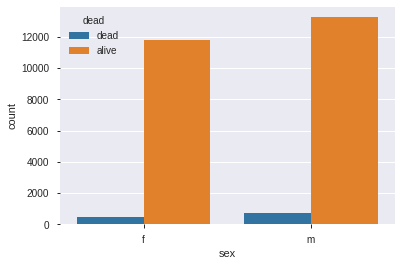

In [ ]:
sns.countplot(x="sex", hue="dead", data=df)
plt.show()

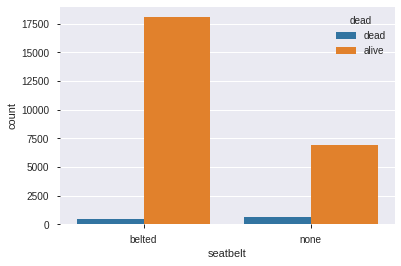

In [ ]:
sns.countplot(x="seatbelt", hue="dead", data=df)
plt.show()

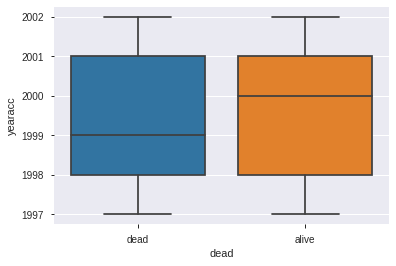

In [ ]:
sns.boxplot(x = 'dead', y = 'yearacc', data = df)
plt.show()

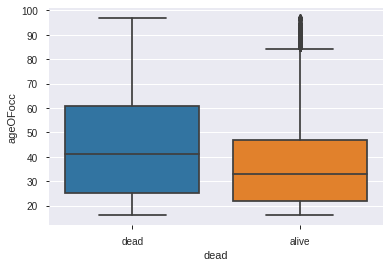

In [ ]:
sns.boxplot(x = 'dead', y = 'ageOFocc', data = df)
plt.show()

In [ ]:
df = df.dropna() # Drop 1 row

In [ ]:
df['dead'].replace({'dead':1,'alive':0},inplace=True)
df['seatbelt'].replace({'belted':1,'none':0},inplace=True)
df['sex'].replace({'f':1,'m':0},inplace=True)
df['occRole'].replace({'driver':1,'pass':0},inplace=True)

df = df.drop(['weight', 'caseid', 'airbag', 'deploy'],axis = 1)
df.columns = ['speed', 'dead', 'seatbelt', 'frontal', 'sex', 'ageOcc', 'yearAcc', 'yearVeh', 'airbag', 'occRole']
df = pd.get_dummies(df, columns = ['speed', 'airbag'])

df.head()

,dead,seatbelt,frontal,sex,ageOcc,yearAcc,yearVeh,occRole,speed_1-9km/h,speed_10-24,speed_25-39,speed_40-54,speed_55+,airbag_deploy,airbag_nodeploy,airbag_unavail
0,1,1,1,1,48,2002,1997.0,1,0,0,0,0,1,1,0,0
1,0,0,1,0,26,2001,1968.0,1,0,0,1,0,0,0,0,1
2,0,0,1,1,51,2002,1994.0,1,0,0,0,0,1,0,0,1
3,0,1,1,0,27,1998,1996.0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,26,2002,1997.0,0,0,1,0,0,0,0,1,0


In [ ]:
df.dtypes

dead                 int64
seatbelt             int64
frontal              int64
sex                  int64
ageOcc               int64
yearAcc              int64
yearVeh            float64
occRole              int64
speed_1-9km/h        uint8
speed_10-24          uint8
speed_25-39          uint8
speed_40-54          uint8
speed_55+            uint8
airbag_deploy        uint8
airbag_nodeploy      uint8
airbag_unavail       uint8
dtype: object

In [ ]:
df['dead'] = df['dead'].astype('category')
df['seatbelt'] = df['seatbelt'].astype('category')
df['sex'] = df['sex'].astype('category')
df['occRole'] = df['occRole'].astype('category')
df['frontal'] = df['frontal'].astype('category')
df['yearVeh'] = df['yearVeh'].astype('category')
df['yearAcc'] = df['yearAcc'].astype('category')
df[list(df.columns[8:])] = df[df.columns[8:]].astype('category')

In [ ]:
df.dtypes

dead               category
seatbelt           category
frontal            category
sex                category
ageOcc                int64
yearAcc            category
yearVeh            category
occRole            category
speed_1-9km/h      category
speed_10-24        category
speed_25-39        category
speed_40-54        category
speed_55+          category
airbag_deploy      category
airbag_nodeploy    category
airbag_unavail     category
dtype: object

In [ ]:
df.head()

,dead,seatbelt,frontal,sex,ageOcc,yearAcc,yearVeh,occRole,speed_1-9km/h,speed_10-24,speed_25-39,speed_40-54,speed_55+,airbag_deploy,airbag_nodeploy,airbag_unavail
0,1,1,1,1,48,2002,1997.0,1,0,0,0,0,1,1,0,0
1,0,0,1,0,26,2001,1968.0,1,0,0,1,0,0,0,0,1
2,0,0,1,1,51,2002,1994.0,1,0,0,0,0,1,0,0,1
3,0,1,1,0,27,1998,1996.0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,26,2002,1997.0,0,0,1,0,0,0,0,1,0


In [ ]:
df['dead'].value_counts()

0    25036
1     1180
Name: dead, dtype: int64

In [ ]:
X = df.drop(['dead'], axis = 1)
y = df['dead']

In [ ]:
ro = RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X, y)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

y_smote = pd.DataFrame(data = y_smote, columns = ['dead'])
smote_df = pd.concat([X_smote, y_smote.reindex(X_smote.index)], axis=1)
smote_df = smote_df.dropna()
X_smote = smote_df.drop(['dead'], axis = 1)
y_smote = smote_df['dead']

X_train_ro, X_test_ro, y_train_ro, y_test_ro = train_test_split(X_ro, y_ro, test_size=.33)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=.33)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ro = RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X, y)

X_train_ro, X_test_ro, y_train_ro, y_test_ro = train_test_split(X_ro, y_ro, test_size=.33)

In [ ]:
new = pd.DataFrame(y_ro, columns = ['dead'])
new['dead'].value_counts()

1    25036
0    25036
Name: dead, dtype: int64

In [ ]:
X_train_ro, X_test_ro, y_train_ro, y_test_ro = train_test_split(X_ro, y_ro, test_size=.33)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=.33)

In [ ]:
table = PrettyTable()

table.field_names = ["Model", "Accuracy","Precision","F1"]

models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

for model, params in zip(models, parameters):

    print(model, params)
    clf = GridSearchCV(model, params)
    clf.fit(X_train_ro,y_train_ro)
    best_model = clf.best_estimator_
    y_hat = best_model.predict(X_test_ro)
    model.fit(X_train_ro,y_train_ro)
    y_hat = model.predict(X_test_ro)
    accuracy = accuracy_score(y_test_ro,y_hat)
    prec = precision_score(y_test_ro, y_hat)
    f1 = f1_score(y_test_ro,y_hat)

    table.add_row([type(model).__name__, format(accuracy, '.2f'),format(prec, '.2f'),format(f1,'.2f')])

print(table)

LogisticRegression() {'penalty': ('l2', 'none'), 'solver': ('newton-cg', 'lbfgs')}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


SVC() {'C': [0.1, 1, 2], 'kernel': ('linear', 'poly', 'rbf')}
DecisionTreeClassifier() {'criterion': ('gini', 'entropy'), 'max_depth': [3, 5, 10]}
RandomForestClassifier() {'n_estimators': [10, 50, 100, 200], 'criterion': ('gini', 'entropy', 'log_loss')}
KNeighborsClassifier() {'n_neighbors': [3, 5, 8], 'algorithm': ('auto', 'ball_tree', 'kd_tree')}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


+------------------------+----------+-----------+------+
|         Model          | Accuracy | Precision |  F1  |
+------------------------+----------+-----------+------+
|   LogisticRegression   |   0.81   |    0.81   | 0.81 |
|          SVC           |   0.58   |    0.65   | 0.45 |
| DecisionTreeClassifier |   0.97   |    0.95   | 0.98 |
| RandomForestClassifier |   0.98   |    0.97   | 0.98 |
|  KNeighborsClassifier  |   0.94   |    0.89   | 0.94 |
+------------------------+----------+-----------+------+


In [ ]:
table = PrettyTable()

table.field_names = ["Model", "Accuracy","Precision","F1"]

models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

for model in models:

    model.fit(X_train_smote,y_train_smote)
    y_hat = model.predict(X_test_smote)
    accuracy = accuracy_score(y_test_smote,y_hat)
    prec = precision_score(y_test_smote, y_hat)
    f1 = f1_score(y_test_smote,y_hat)

    table.add_row([type(model).__name__, format(accuracy, '.2f'),format(prec, '.2f'),format(f1,'.2f')])

print(table)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

+------------------------+----------+-----------+------+
|         Model          | Accuracy | Precision |  F1  |
+------------------------+----------+-----------+------+
|   LogisticRegression   |   0.95   |    0.51   | 0.18 |
|          SVC           |   0.95   |    0.00   | 0.00 |
| DecisionTreeClassifier |   0.93   |    0.29   | 0.31 |
| RandomForestClassifier |   0.95   |    0.50   | 0.25 |
|  KNeighborsClassifier  |   0.95   |    0.69   | 0.14 |
+------------------------+----------+-----------+------+
